In [95]:
#importing libraries required for the project
import os
import pandas as pd
import numpy as np
from scipy.stats import mode
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report


Reading and processing data

In [150]:
#from google.colab import drive
#drive.mount('/content/drive')

In [151]:
# Define folders containing the CSV files
folder = 'D:/Project_hand_washing/task_plot_creation/new_dataset.csv'

In [152]:
df = pd.read_csv(folder)

In [153]:
mf = pd.DataFrame(df)
columns_to_remove = ['timestamp', 'datetime', 'compulsive', 'user yes/no', 'urge', 'tense', 'ignore']
filtered_data = mf.drop(columns=columns_to_remove)
print(filtered_data)

            acc x     acc y     acc z    gyro x    gyro y    gyro z  relabeled
0       -6.782696  1.578318  7.173084  0.458149 -0.781907  0.763581          0
1       -6.387518  1.374741  7.199429  0.293215 -0.707382  0.879646          0
2       -6.526429  1.161585  6.852151  0.466701 -0.687834  1.080009          0
3       -6.924002  1.223855  6.193520  0.597426 -1.149648  1.464854          0
4       -7.522757  1.537603  6.940767  0.481362 -1.860695  1.671327          0
...           ...       ...       ...       ...       ...       ...        ...
1048570  2.864444 -9.477093  0.704136  2.812422 -0.388510  0.452040          0
1048571  3.149451 -8.945398  0.361648  4.065918 -0.375071  0.755029          0
1048572  3.376978 -9.326206  0.263452  3.673742 -0.149051  0.905302          0
1048573  3.113526 -9.558523  0.399968  2.524094  0.403171  1.241278          0
1048574  2.725532 -9.659114  0.524509  1.321912  1.042136  1.183856          0

[1048575 rows x 7 columns]


In [62]:
values = filtered_data.count()
print(values)

acc x        1048575
acc y        1048575
acc z        1048575
gyro x       1048575
gyro y       1048575
gyro z       1048575
relabeled    1048575
dtype: int64


In [154]:
print(filtered_data)

            acc x     acc y     acc z    gyro x    gyro y    gyro z  relabeled
0       -6.782696  1.578318  7.173084  0.458149 -0.781907  0.763581          0
1       -6.387518  1.374741  7.199429  0.293215 -0.707382  0.879646          0
2       -6.526429  1.161585  6.852151  0.466701 -0.687834  1.080009          0
3       -6.924002  1.223855  6.193520  0.597426 -1.149648  1.464854          0
4       -7.522757  1.537603  6.940767  0.481362 -1.860695  1.671327          0
...           ...       ...       ...       ...       ...       ...        ...
1048570  2.864444 -9.477093  0.704136  2.812422 -0.388510  0.452040          0
1048571  3.149451 -8.945398  0.361648  4.065918 -0.375071  0.755029          0
1048572  3.376978 -9.326206  0.263452  3.673742 -0.149051  0.905302          0
1048573  3.113526 -9.558523  0.399968  2.524094  0.403171  1.241278          0
1048574  2.725532 -9.659114  0.524509  1.321912  1.042136  1.183856          0

[1048575 rows x 7 columns]


In [ ]:
# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Plot accelerometer data
ax.plot(mf['timestamp'], mf['acc x'], label='Acc X')
ax.plot(mf['timestamp'], mf['acc y'], label='Acc Y')
ax.plot(mf['timestamp'], mf['acc z'], label='Acc Z')

# Markers for routine/compulsive behavior
for index, row in mf.iterrows():
    color = 'b' #if row['compulsive'] == 0 else 'r'
    marker = 'o' #if row['compulsive'] == 0 else 'x'
    ax.scatter(row['timestamp'], row['acc x'], color=color, marker=marker)

# Set labels and title
ax.set_xlabel('Timestamp')
ax.set_ylabel('Accelerometer Data')
ax.set_title('Handwash Event')

# Add a legend
ax.legend()

# Display the plot
plt.show()

In [155]:
# choosing relabeled as label value
filtered_data['label'] = filtered_data['relabeled']  # Create a 'label' column for majority voting

In [156]:
label_counts = filtered_data['label'].value_counts()
count_label_0 = label_counts.get(0, 0)  # Count of label 0, default to 0 if not found
count_label_1 = label_counts.get(1, 0)  # Count of label 1, default to 0 if not found
count_label_2 = label_counts.get(2, 0)  # Count of label 2, default to 0 if not found

print(count_label_0)
print(count_label_1)
print(count_label_2)

1035268
7604
5703


In [1]:
# Split data into train and test sets
train_data, test_data = train_test_split(filtered_data, test_size=0.4, random_state=42)
print(f"Number of train DataFrames: {len(train_data)}")
print(f"Number of test DataFrames: {len(test_data)}")

NameError: name 'train_test_split' is not defined

Data Preprocessing using undersampler

In [172]:
undersampler = RandomUnderSampler(sampling_strategy='not minority', random_state=44)
X_label_0_undersampled, y_label_0_undersampled = undersampler.fit_resample(train_data.iloc[:, :-1], train_data['label'])
# Create a new dataFrame with the undersampled data
undersampled_data = pd.DataFrame(X_label_0_undersampled, columns=filtered_data.columns[:-1])
undersampled_data['label'] = y_label_0_undersampled
values = undersampled_data.count()
print(values)
# Verify the class distribution
undersampled_label_counts = undersampled_data['label'].value_counts()
print(undersampled_label_counts)

acc x        10326
acc y        10326
acc z        10326
gyro x       10326
gyro y       10326
gyro z       10326
relabeled    10326
label        10326
dtype: int64
0    3442
1    3442
2    3442
Name: label, dtype: int64


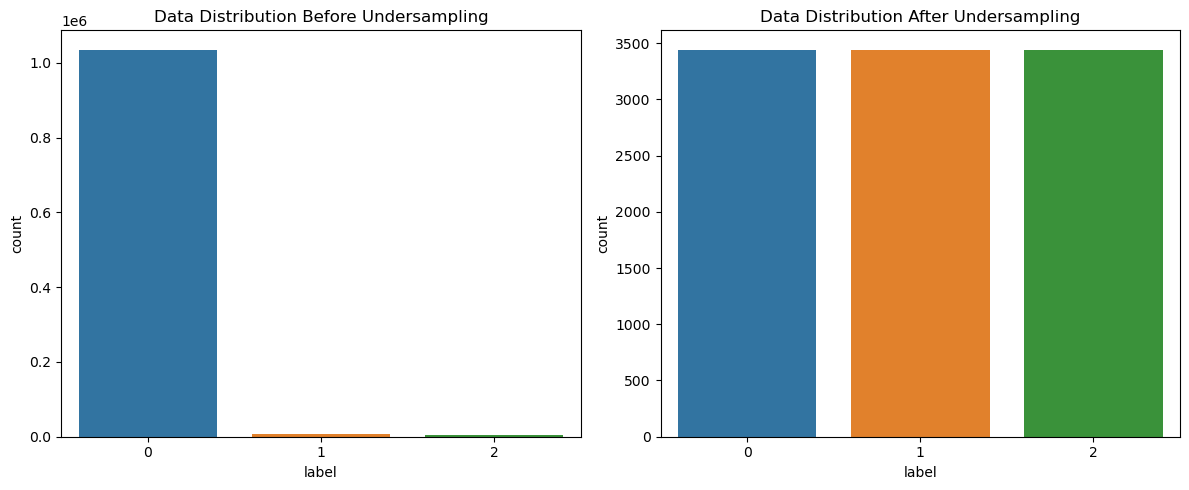

In [173]:
# Plot the data distribution before and after undersampling
plt.figure(figsize=(12, 5))

# Plot before undersampling
plt.subplot(1, 2, 1)
sns.countplot(data=filtered_data, x='label')
plt.title('Data Distribution Before Undersampling')

# Plot after undersampling
plt.subplot(1, 2, 2)
sns.countplot(data=undersampled_data, x='label')
plt.title('Data Distribution After Undersampling')

plt.tight_layout()
plt.show()

Splitting Preprocessed data into train and test set

In [174]:
# Define window size
window_size = 150
step_size = 50
# Initialize lists to store windowed data and labels
train_windows = []
train_labels = []
test_windows = []
test_labels = []
i=0

In [175]:
# Generate windows and labels using a sliding window approach
for i in range(0,len(train_data)-window_size+1,step_size):
    window = train_data.iloc[i:i+window_size, :-1]  # Select only sensor axes columns
    train_windows.append(window)
    label_window = train_data.iloc[i:i+window_size, -1]  # Select the label column for majority voting
    majority_label = np.bincount(label_window).argmax()  # Majority voting
    train_labels.append(majority_label)

In [176]:
# Convert lists to numpy arrays
train_windows = np.array(train_windows)
train_labels = np.array(train_labels)
# Flatten the sensor axes data in each window
train_windows = train_windows.reshape(train_windows.shape[0], -1)

In [177]:
clf = RandomForestClassifier(n_estimators=100,max_depth=5, random_state=1)
clf.fit(train_windows, train_labels)

RandomForestClassifier(max_depth=5, random_state=1)

In [178]:
# Generate windows and labels using a sliding window approach
#for i in range(0, len(train_data) - window_size + 1):
for i in range(0,len(test_data)-window_size+1, step_size):
    window = test_data.iloc[i:i+window_size, :-1]  # Select only sensor axes columns
    test_windows.append(window)
    label_window = test_data.iloc[i:i+window_size, -1]  # Select the label column for majority voting
    majority_label = np.bincount(label_window).argmax()  # Majority voting
    test_labels.append(majority_label)

In [180]:
test_windows = np.array(test_windows)
test_windows_flattened = test_windows.reshape(test_windows.shape[0], -1)

# Make predictions using the trained classifier
predictions = clf.predict(test_windows_flattened)

# Calculate accuracy and F1 score
accuracy = accuracy_score(test_labels, predictions)
f1 = f1_score(test_labels, predictions, average='weighted')

In [181]:
print(np.mean(test_labels))

0.0


In [182]:
print(accuracy)
print(f1)

1.0
1.0


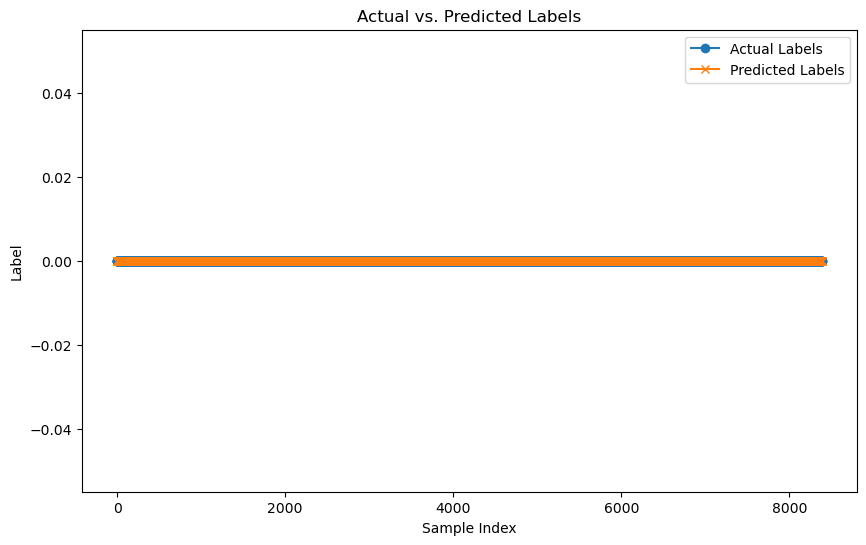

In [183]:
# Plot actual vs. predicted labels
plt.figure(figsize=(10, 6))
plt.plot(test_labels, label='Actual Labels', marker='o')
plt.plot(predictions, label='Predicted Labels', marker='x')
plt.xlabel('Sample Index')
plt.ylabel('Label')
plt.title('Actual vs. Predicted Labels')
plt.legend()
plt.show()

In [184]:
cm = confusion_matrix(test_labels, predictions)
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[8386]]


In [185]:
report = classification_report(test_labels, predictions)
# Print the report
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      8386

    accuracy                           1.00      8386
   macro avg       1.00      1.00      1.00      8386
weighted avg       1.00      1.00      1.00      8386

